In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('default')

Title = 'NN 15'
path = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/nuevas_redes/NN15/50k/'
path_ini = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/cont_redes_anteriores/NNini'

In [3]:
!cat C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/nuevas_redes/NN15/50k/convergence.dat | head -n 5

 epoch             MAE          <RMSE>             MAE          <RMSE>
     0    3.099588E-01    3.124610E-01    3.100883E-01    3.124346E-01 <
     1    3.099588E-01    3.124610E-01    3.100883E-01    3.124346E-01 <
     2    7.688734E-02    8.037507E-02    7.661319E-02    7.990893E-02 <
     3    3.041949E-02    3.878210E-02    2.943295E-02    3.756720E-02 <


In [4]:
!ls C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/cont_redes_anteriores/NNini/convergence.dat

C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/NNs/cont_redes_anteriores/NNini/convergence.dat


# Carga de datos

In [5]:
conv = pd.read_csv(path+"/convergence.dat",delim_whitespace=True, skiprows= 1, header = None )
enertest = pd.read_csv(path+"/energies.test",delim_whitespace=True,  header = None, usecols=[0,1])
enertrain = pd.read_csv(path+"/energies.train",delim_whitespace=True,header = None, usecols=[0,1])
conv_ini = pd.read_csv(path_ini+"/convergence.dat",delim_whitespace=True, skiprows= 1, header = None )

print('La cantidad de configuraciones es ' +str( len(enertest)+len(enertrain)))
print('Numero de epochs: ' + str(len(conv)))

Edft = -155.82
Eann = -155.846302046530

# Edft = 0
# Eann = 0
enertrain[0] = enertrain[0]- Edft
enertrain[1] = enertrain[1]- Eann
enertest[0] = enertest[0]- Edft
enertest[1] = enertest[1]- Eann

La cantidad de configuraciones es 24165
Numero de epochs: 50001


In [6]:
conv.head()

,0,1,2,3,4,5
0,0,0.309959,0.312461,0.310088,0.312435,<
1,1,0.309959,0.312461,0.310088,0.312435,<
2,2,0.076887,0.080375,0.076613,0.079909,<
3,3,0.030419,0.038782,0.029433,0.037567,<
4,4,0.022702,0.036720,0.021979,0.035376,<


In [7]:
print('enertrain',enertrain.describe())
print('enertest',enertest.describe())

enertrain                   0             1
count  22957.000000  22957.000000
mean       1.708135      1.734495
std        2.254214      2.251448
min       -0.296600     -0.287498
25%        0.304500      0.332502
50%        0.812100      0.841402
75%        2.082900      2.117102
max       19.672800     19.680302
enertest                  0            1
count  1208.000000  1208.000000
mean      1.694483     1.716953
std       2.173452     2.160124
min      -0.277500    -0.272798
25%       0.343200     0.365827
50%       0.834400     0.858752
75%       2.104350     2.153552
max      14.630600    14.444002


# Grafico de Convergencia

## RMSE y MAE

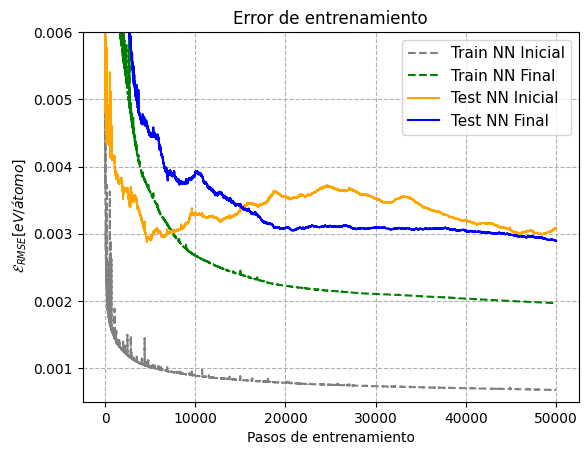

<Figure size 640x480 with 0 Axes>

In [8]:
# RMSE = 6.703596E-04
# RMSE_test = 1.818623E-03
plt.title('Error de entrenamiento')
plt.xlabel('Pasos de entrenamiento')
plt.ylabel(' $\mathcal{E}_{RMSE}    [eV/átomo]$')
# plt.yscale('log')
plt.ylim(0.0005,0.006)
plt.rcParams['font.size'] = 11
plt.grid(linestyle='--' ) 

plt.plot(conv_ini[0],conv_ini[2], linestyle='--' , color = 'gray'      , label = 'Train NN Inicial')
plt.plot(conv[0]    ,conv[2]    ,  linestyle='--', color = 'g' ,label = 'Train NN Final')
plt.plot(conv_ini[0],conv_ini[4],                  color = 'orange'      , label = 'Test NN Inicial') 
plt.plot(conv[0]    ,conv[4]    ,                  color = 'b' , label = 'Test NN Final')

plt.legend()
#plt.savefig(path+run+'convergence-'+Title+'.png')
plt.show()
plt.clf()

# Grafico de Correlacion

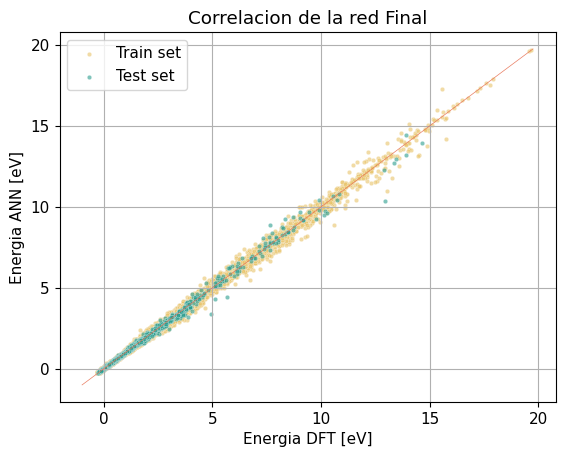

In [9]:
fig, ax = plt.subplots()
plt.title(f'Correlacion de la red Final')
ax.set_xlabel('Energia DFT [eV]')
ax.set_ylabel('Energia ANN [eV]')
ax.grid()

X = np.arange(-1,20,0.25)
plt.plot(X,X, color = '#e76f51',linewidth=0.5, alpha =0.9)
#ax.set_axis('equal')
sns.scatterplot(data=enertrain, x=0, y=1, label='Train set', color='#e9c46a', s=10, alpha = 0.6)
sns.scatterplot(data=enertest , x=0, y=1, label='Test set' , color='#2a9d8f', s=10, alpha = 0.6)
# ax.set_xlim(-0.4,5)
# ax.set_ylim(-0.4,5)
plt.show()
#ax.set_scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset',s=5, alpha = 0.3)
#ax.set_scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset'   ,s=5, alpha = 0.3)

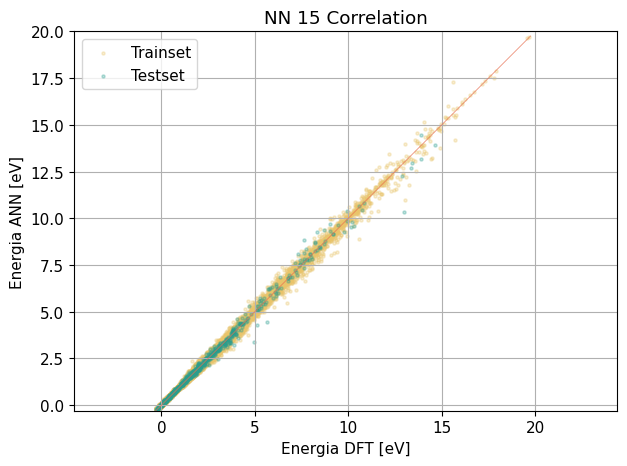

In [10]:
ax = plt.subplot(111)
plt.title(Title + ' Correlation')
plt.xlabel('Energia DFT [eV]')
plt.ylabel('Energia ANN [eV]')
plt.axis('equal')
plt.scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset',s=5, alpha = 0.3)
plt.scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset',s=5, alpha = 0.3)
#sns.histplot(data=enertrain, x=1, bins=20)
X = np.arange(-1,20,0.25)
plt.plot(X,X, color = '#e76f51',linewidth=0.5, alpha =0.9)
plt.xlim(-0.3,20)
plt.ylim(-0.3,20)
plt.legend(loc = 'upper left')
plt.grid()
plt.tight_layout()
#plt.savefig(path+run+'energyCorrelation'+Title+'.png')

## Multiplot by ranges

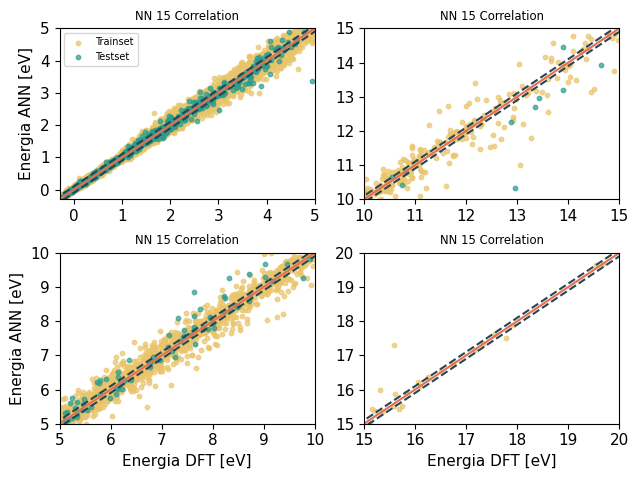

In [11]:
fig, ax = plt.subplots(2, 2)
plt.rcParams['font.size'] = 7
X = np.arange(-5,50,0.25)
ax[0,0].plot(X,X, color = '#e76f51')
ax[0,0].plot(X,X+0.1,'#264653' ,linestyle = '--')
ax[0,0].plot(X,X-0.1,'#264653' ,linestyle = '--')

ax[0,1].plot(X,X, color = '#e76f51')
ax[0,1].plot(X,X+0.1,'#264653' ,linestyle = '--')
ax[0,1].plot(X,X-0.1,'#264653' ,linestyle = '--')

ax[1,0].plot(X,X, color = '#e76f51')
ax[1,0].plot(X,X+0.1,'#264653' ,linestyle = '--')
ax[1,0].plot(X,X-0.1,'#264653' ,linestyle = '--')

ax[1,1].plot(X,X, color = '#e76f51')
ax[1,1].plot(X,X+0.1,'#264653' ,linestyle = '--')
ax[1,1].plot(X,X-0.1,'#264653' ,linestyle = '--')

# -1,5
ax[0,0].set_title(Title + ' Correlation')
#ax[0,0].set_xlabel('Energia DFT [eV]')
ax[0,0].set_ylabel('Energia ANN [eV]')
ax[0,0].set_xlim(-0.3,5)
ax[0,0].set_ylim(-0.3,5)
ax[0,0].scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset', s=10, alpha = 0.7)
ax[0,0].scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset', s=10, alpha = 0.7)

# 5, 10
ax[1,0].set_title(Title + ' Correlation')
ax[1,0].set_xlabel('Energia DFT [eV]')
ax[1,0].set_ylabel('Energia ANN [eV]')
ax[1,0].set_xlim(5,10)
ax[1,0].set_ylim(5,10)
ax[1,0].scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset', s=10, alpha = 0.7)
ax[1,0].scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset', s=10, alpha = 0.7)

# 10, 15
ax[0,1].set_title(Title + ' Correlation')
#ax[0,1].set_xlabel('Energia DFT [eV]')
#ax[0,1].set_ylabel('Energia ANN [eV]')
ax[0,1].set_xlim(10,15)
ax[0,1].set_ylim(10,15)
ax[0,1].scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset', s=10, alpha = 0.7)
ax[0,1].scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset', s=10, alpha = 0.7)

# 15,20
ax[1,1].set_title(Title + ' Correlation')
ax[1,1].set_xlabel('Energia DFT [eV]')
#ax[1,1].set_ylabel('Energia ANN [eV]')
ax[1,1].set_xlim(15,20)
ax[1,1].set_ylim(15,20)
ax[1,1].scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset', s=10, alpha = 0.7)
ax[1,1].scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset', s=10, alpha = 0.7)

ax[0,0].legend(loc = 'upper left')
fig.tight_layout()
#fig.savefig(path+run+'MultiCorrelation.png', dpi = 600)
plt.show()

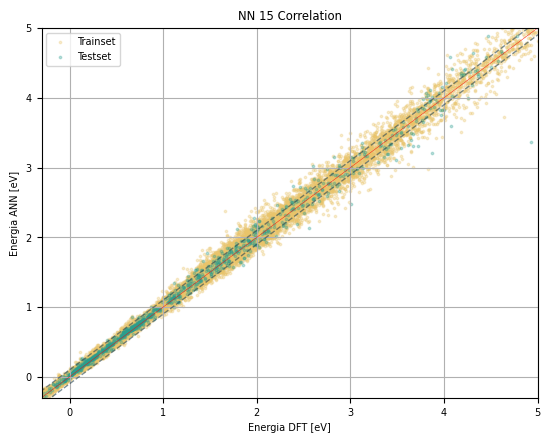

In [12]:
plt.clf()
plt.rcParams['font.size'] = 7
X = np.arange(-5,50,0.25)
plt.plot(X,X, color = 'r', linewidth=0.3)
plt.plot(X,X+0.1,'#264653' ,linestyle = '--', linewidth=1, alpha =0.6)
plt.plot(X,X-0.1,'#264653' ,linestyle = '--', linewidth=1, alpha =0.6)
plt.title(Title + ' Correlation')
plt.xlabel('Energia DFT [eV]')
plt.ylabel('Energia ANN [eV]')
plt.xlim(-0.3,5)
plt.ylim(-0.3,5)
plt.scatter(enertrain[0],enertrain[1], color ='#e9c46a', label = 'Trainset', s=3, alpha = 0.3)
plt.scatter(enertest[0],enertest[1],color = '#2a9d8f', label = 'Testset', s=3, alpha = 0.3)
plt.legend(loc = 'upper left')
plt.grid()
#plt.savefig(path+run+'energyCorrelationZOOM'+Title+'.png', dpi = 600)
plt.show()

In [13]:
enertest.columns = ['DFT', 'RNA']
enertrain.columns = ['DFT', 'RNA']

In [14]:
enertrain['error'] = enertrain['RNA'] - enertrain['DFT']
enertest['error'] =  enertest['RNA'] - enertest['DFT']

<Axes: xlabel='DFT', ylabel='error'>

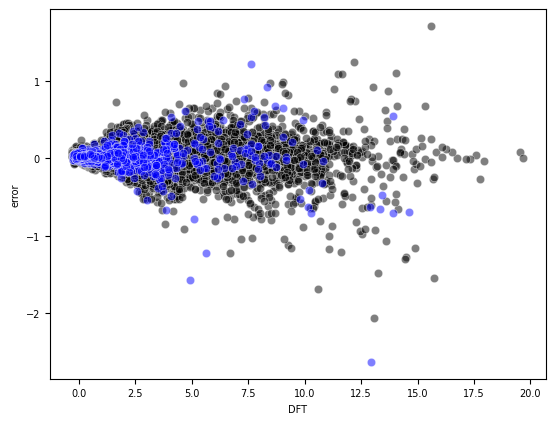

In [15]:
sns.scatterplot(data=enertrain, x='DFT', y='error', color='black',alpha=0.5)
sns.scatterplot(data=enertest , x='DFT', y='error', color='blue' ,alpha=0.5)

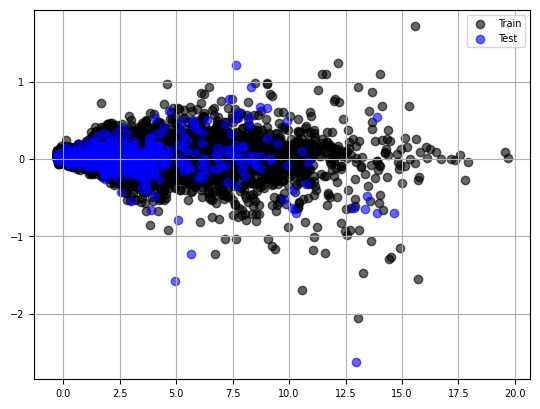

In [16]:
fig, ax = plt.subplots()
ax.scatter(enertrain.DFT,enertrain.error, color = 'black', alpha=0.6, label='Train', )
ax.scatter(enertest.DFT,enertest.error , color = 'blue'  , alpha=0.6, label='Test' , )
ax.grid()
ax.legend()

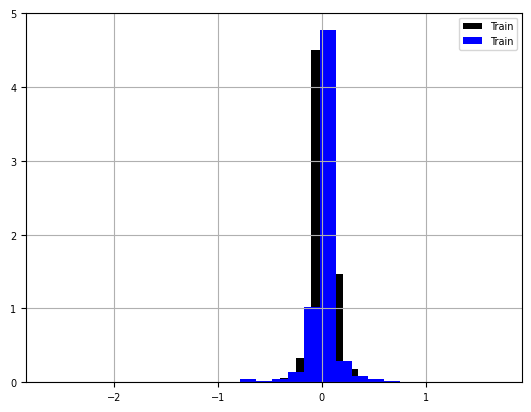

In [17]:
fig, ax = plt.subplots()
ax.hist(enertrain.error,bins=25, color = 'black',label='Train', density=True )
ax.hist(enertest.error ,bins=25, color = 'blue',label='Train', density=True )
ax.grid()
ax.legend()

In [18]:
enertest['kind'] = 'Test'
enertrain['kind'] = 'Train'
errors = pd.concat([enertrain,enertest])

In [19]:
errors['Round_E'] = round(errors.DFT,1)
mean_err = errors.groupby('Round_E')['error'].agg('mean')

In [20]:
mean_err

Round_E
-0.3     0.042474
-0.2     0.021285
-0.1     0.025423
-0.0     0.020812
 0.1     0.028378
           ...   
 17.6    0.049702
 17.8   -0.265898
 17.9   -0.037398
 19.5    0.088802
 19.7    0.007502
Name: error, Length: 170, dtype: float64

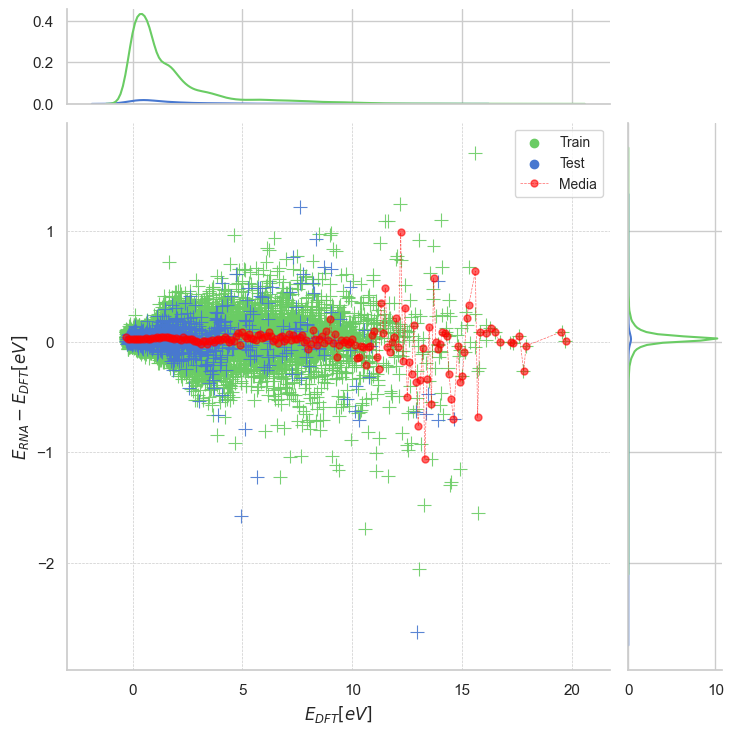

In [22]:

# Ajusta el estilo del gráfico
sns.set(style="whitegrid")

sns.set_palette([sns.color_palette("muted")[2], sns.color_palette("muted")[0]])
# Crea el gráfico de dispersión con líneas de regresión y ejes en los histogramas
g = sns.jointplot(data=errors, x='DFT', y='error', hue='kind',marker='+', alpha=0.9, height=7.5, s=100,marginal_kws=dict(fill=False),marginal_ticks=True)

plt.plot(mean_err.index, mean_err.values, label='Media', linestyle='--', marker='o', markersize=5 , linewidth=0.5 , color='red',alpha=0.6)
# Añade etiquetas a los ejes
g.set_axis_labels("$E_{DFT} [eV]$", "$ E_{RNA} - E_{DFT} [eV]$", fontsize=12)

# Añade leyenda
g.ax_joint.legend(loc='upper right', fontsize=10)

# Añade una cuadrícula
g.ax_joint.grid(True, linestyle="--", linewidth=0.5)




# Muestra el gráfico
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_14932\3216054534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_low['Round_E'] = round(errors_low.DFT,1)


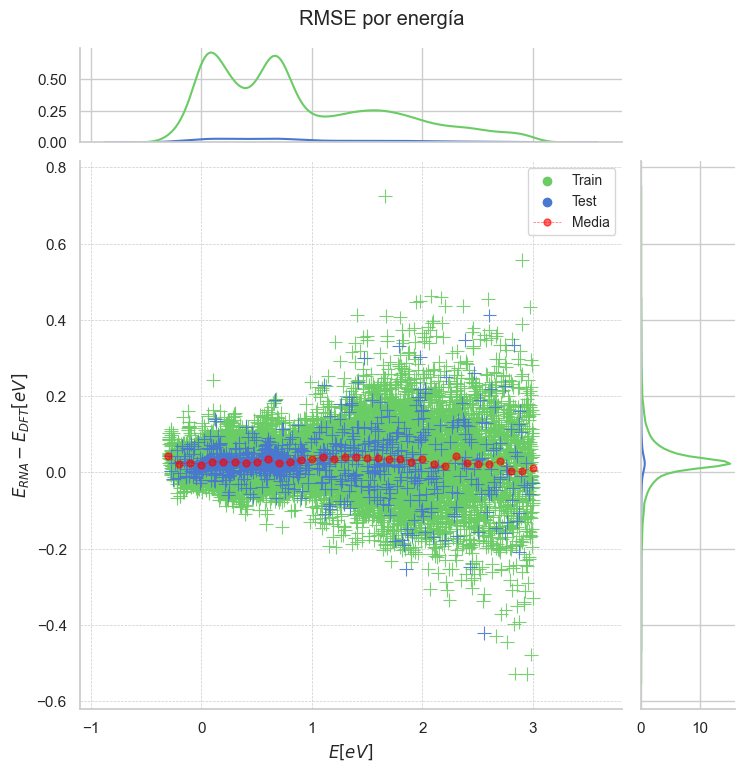

In [23]:
errors_low = errors.query('DFT < 3')
errors_low['Round_E'] = round(errors_low.DFT,1)
mean_err = errors_low.groupby('Round_E')['error'].agg('mean')
# Ajusta el estilo del gráfico
sns.set(style="whitegrid")

sns.set_palette([sns.color_palette("muted")[2], sns.color_palette("muted")[0]])
# Crea el gráfico de dispersión con líneas de regresión y ejes en los histogramas
g = sns.jointplot(data=errors_low, x='DFT', y='error', hue='kind',marker='+', alpha=0.9, height=7.5, s=100,marginal_kws=dict(fill=False),marginal_ticks=True)

plt.plot(mean_err.index, mean_err.values, label='Media', linestyle='--', marker='o', markersize=5 , linewidth=0.5 , color='red',alpha=0.6)
# Añade título
g.fig.suptitle("RMSE por energía", y=1.02)

# Añade etiquetas a los ejes
g.set_axis_labels("$E [eV]$", "$ E_{RNA} - E_{DFT} [eV]$", fontsize=12)

# Añade leyenda
g.ax_joint.legend(loc='upper right', fontsize=10)

# Añade una cuadrícula
g.ax_joint.grid(True, linestyle="--", linewidth=0.5)
# Muestra el gráfico
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_14932\1263816746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_low['Round_E'] = round(errors_low.DFT,1)


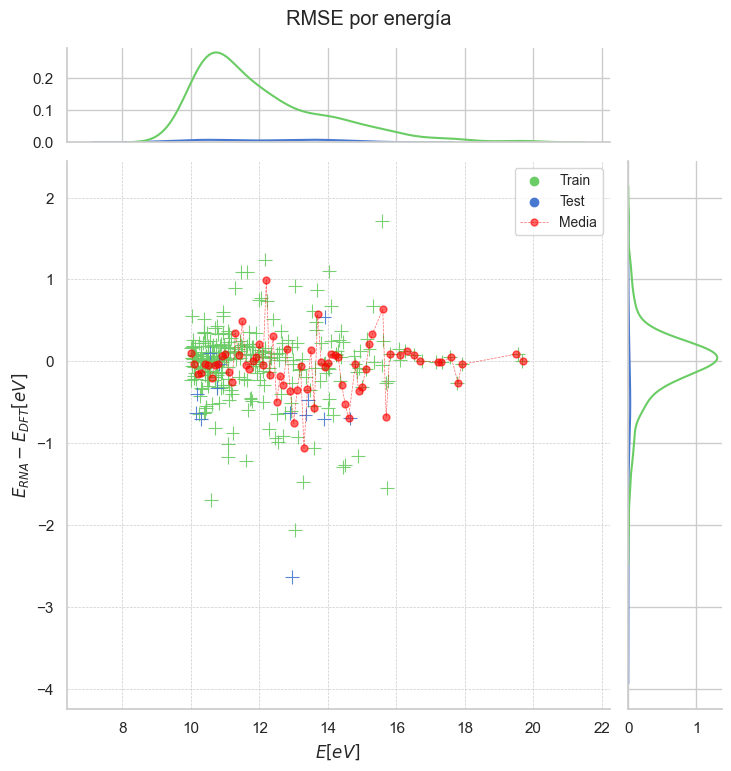

In [26]:
errors_low = errors.query('DFT > 10')
errors_low['Round_E'] = round(errors_low.DFT,1)
mean_err = errors_low.groupby('Round_E')['error'].agg('mean')
# Ajusta el estilo del gráfico
sns.set(style="whitegrid")

sns.set_palette([sns.color_palette("muted")[2], sns.color_palette("muted")[0]])
# Crea el gráfico de dispersión con líneas de regresión y ejes en los histogramas
g = sns.jointplot(data=errors_low, x='DFT', y='error', hue='kind',marker='+', alpha=0.9, height=7.5, s=100,marginal_kws=dict(fill=False),marginal_ticks=True)

plt.plot(mean_err.index, mean_err.values, label='Media', linestyle='--', marker='o', markersize=5 , linewidth=0.5 , color='red',alpha=0.6)
# Añade título
g.fig.suptitle("RMSE por energía", y=1.02)

# Añade etiquetas a los ejes
g.set_axis_labels("$E [eV]$", "$ E_{RNA} - E_{DFT} [eV]$", fontsize=12)

# Añade leyenda
g.ax_joint.legend(loc='upper right', fontsize=10)

# Añade una cuadrícula
g.ax_joint.grid(True, linestyle="--", linewidth=0.5)
# Muestra el gráfico
plt.show()

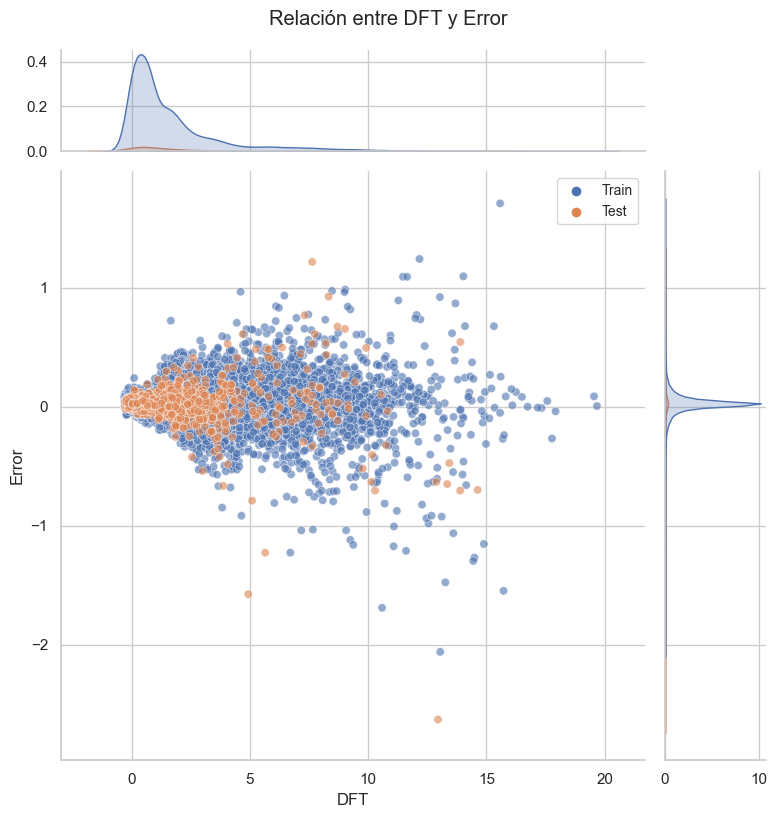

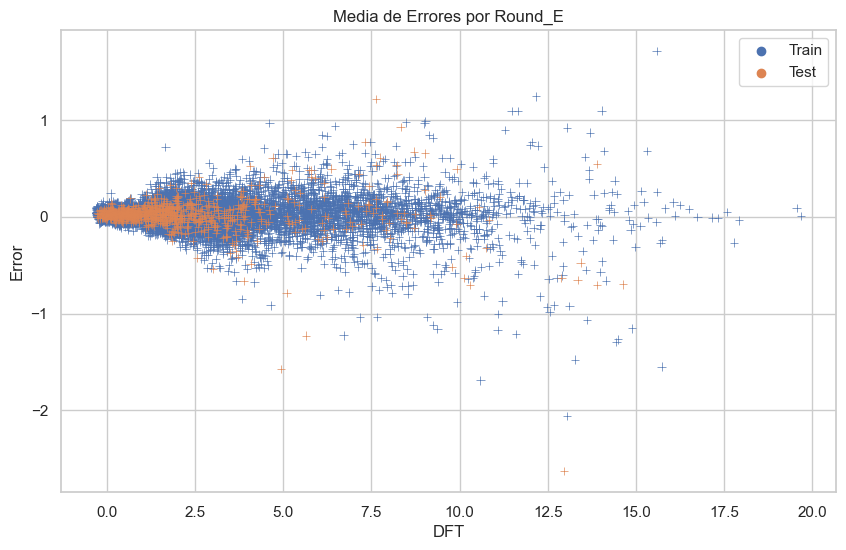

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajusta el estilo del gráfico
sns.set(style="whitegrid")

sns.color_palette(['green','blue'])
# Crea el gráfico de dispersión con líneas de regresión y ejes en los histogramas
g = sns.jointplot(data=errors, x='DFT', y='error', hue='kind', alpha=0.6, height=8, marginal_ticks=True)

# Añade título
g.fig.suptitle("Relación entre DFT y Error", y=1.02)

# Añade etiquetas a los ejes
g.set_axis_labels("DFT", "Error", fontsize=12)

# Añade leyenda
g.ax_joint.legend(loc='upper right', fontsize=10)

# Añade valores numéricos a los histogramas en los márgenes
for ax in [g.ax_marg_x, g.ax_marg_y]:
    for bar in ax.patches:
        ax.annotate(f"{bar.get_height():.2f}", 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

# Gráfico de la media de errores
mean_err = errors.groupby('Round_E')['error'].agg('mean')
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión original
sns.scatterplot(data=errors, x='DFT', y='error', hue='kind', marker='+', ax=ax)

# Gráfico de la media de errores

# Añade título y etiquetas al segundo gráfico
ax.set_title("Media de Errores por Round_E")
ax.set_xlabel("DFT")
ax.set_ylabel("Error")

# Añade leyenda al segundo gráfico
ax.legend()

# Muestra el gráfico combinado
plt.show()


In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajusta el estilo del gráfico
sns.set(style="whitegrid")
sns.color_pallete(['green','blue'])
# colors = {'Train': 'green', 'Test': 'blue'}
# Crea el gráfico de dispersión con líneas de regresión y ejes en los histogramas
g = sns.jointplot(data=errors, x='DFT', y='error', hue='kind', marker='+', alpha=0.6, height=7.5, s=100, marginal_kws=dict(fill=False), marginal_ticks=True)

# Define colores para Train y Test

# Personaliza los colores de las categorías en el gráfico de dispersión
for kind, color in colors.items():
    g.ax_joint.scatter(errors.loc[errors['kind'] == kind, 'DFT'],
                       errors.loc[errors['kind'] == kind, 'error'],
                       color=color, label=kind, alpha=0.6, s=100, marker='+')

# Gráfico de la media de errores
mean_err = errors.groupby('Round_E')['error'].agg('mean')
plt.plot(mean_err.index, mean_err.values, label='Media', linestyle='--', marker='o', markersize=5, linewidth=0.5, color='red', alpha=0.6)

# Añade título
g.fig.suptitle("RMSE por energía", y=1.02)

# Añade etiquetas a los ejes
g.set_axis_labels("$E_{DFT} [eV]$", "$\mathcal{E}_{RMSE} [eV/átomo]$", fontsize=12)

# Añade leyenda
g.ax_joint.legend(loc='upper right', fontsize=10)

# Añade una cuadrícula
g.ax_joint.grid(True, linestyle="--", linewidth=0.5)

# Muestra el gráfico
plt.show()


AttributeError: module 'seaborn' has no attribute 'color_pallete'